In [1]:
from sympy import *
init_printing()

In [15]:
r,rprime,rpprime = symbols("r r' r''",positive=True)
R,Rprime,Rpprime = symbols("R R' R''",positive=True)
re,rh = symbols("r_e r_h",positive=True)

k,l,m,n = symbols("k l m n",real=True,positive=True)

## functions

In [3]:
def cdf3d(func3d,rmax):
    return integrate(4*pi*r**2*func3d,(r,0,rmax))
def cdf2d(func2d,Rmax):
    return integrate(2*pi*R*func2d,(R,0,Rmax))

def Abeltrans(func3d,Rnew=R,simplify_func=lambda x:x):
    return integrate(simplify(2*r/sqrt(r**2-Rnew**2)*func3d),(r,Rnew,oo))
def invAbeltrans(func2d,rnew=r,simplify_func=lambda x:x):
    return -1/pi*integrate(simplify((1/sqrt(R**2-rnew**2)*diff(func2d,R))),(R,rnew,oo))

# list of stellar model

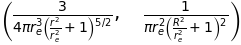

In [4]:
plummer3d =Rational(3,4)/pi/re**3 * (1+(r/re)**2)**-Rational(5,2)
plummer2d = Abeltrans(plummer3d,R)
plummer3d,plummer2d


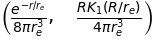

In [5]:
exp3d3d = Rational(1,8)/pi/re**3*exp(-r/re)
exp3d2d = Rational(1,4)/pi/re**2*(R/re)*besselk(1,R/re)
exp3d3d,exp3d2d

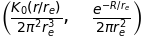

In [6]:
exp2d3d = Rational(1,2)/pi**2/re**3*besselk(0,r/re)
exp2d2d = Rational(1,2)/pi/re**2*exp(-R/re)
exp2d3d,exp2d2d

In [7]:
hernquist3d = re/2/pi/r/(r+re)**3
hernquist2d = (simplify(factor(simplify(Abeltrans(hernquist3d)))))
(hernquist3d,hernquist2d)

⎛                 ⎧                        ⎛                ____________      
⎜                 ⎪                        ⎜   2       2   ╱    2     2       
⎜                 ⎪                    -rₑ⋅⎜3⋅R ⋅rₑ + R ⋅╲╱  - R  + rₑ  ⋅acosh
⎜                 ⎪                        ⎝                                  
⎜                 ⎪                    ───────────────────────────────────────
⎜                 ⎪                                                  ⎛ 6      
⎜       rₑ        ⎪                                              2⋅π⋅⎝R  - 3⋅R
⎜───────────────, ⎨                                                           
⎜              3  ⎪    ⎛                  __________                    ______
⎜2⋅π⋅r⋅(r + rₑ)   ⎪    ⎜   2         2   ╱  2     2      ⎛rₑ⎞      2   ╱  2   
⎜                 ⎪-rₑ⋅⎜6⋅R ⋅rₑ + 2⋅R ⋅╲╱  R  - rₑ  ⋅asin⎜──⎟ - π⋅R ⋅╲╱  R  - 
⎜                 ⎪    ⎝                                 ⎝R ⎠                 
⎜                 ⎪─────────────────────────────────

In [20]:
bn = Symbol("b_n",positive=True)
sersic2d = exp(-bn*((R/re)**(1/n)))
display(sersic2d)
display(simplify(integrate(2*pi*R*sersic2d,(R,0,oo))))
display(simplify(integrate(2*pi*R*sersic2d,(R,0,R))))

In [9]:
a1,a2,a3,a4,a5 = symbols("\alpha_1 \alpha_2 \alpha_3 \alpha_4 \alpha_5")
g0,g1,g2,g3,g4,g5 = symbols("\gamma_0 \gamma_1 \gamma_2 \gamma_3 \gamma_4 \gamma_5")
r1,r2,r3,r4,r5 = symbols("r_1 r_2 r_3 r_4 r_5")
myprofile = r**-g0 * (1+(r/r1)**a1 ) ** ((g0-g1)/a1) * (1+(r/r2)**a2 ) ** ((g1-g2)/a2)  * (1+(r/r3)**a3 ) ** ((g2-g3)/a3)
re = 200
plotfunc1 = myprofile.subs([(g0,0),(g1,4),(g2,4),(g3,4),(a1,2),(a2,2),(a3,2),(r1,0.5*pi*re),(r2,1.5*pi*re),(r3,2.5*pi*re)])
plotfunc2 = myprofile.subs([(g0,1),(g1,4),(g2,4),(g3,4),(a1,2),(a2,2),(a3,2),(r1,1*pi*re),(r2,2*pi*re),(r3,3*pi*re)])
plot(plotfunc1+plotfunc2,exp(-r/re),(r,0.1,100),xscale="log",yscale="log",legend=True)

<Figure size 640x480 with 1 Axes>

In [11]:
myprofile = r**-g0 * (1+(r/r1)**a1 ) ** ((g0-g1)/a1)
#Abeltrans(myprofile)